# Use Nafis' sims to get N and B

In [1]:
# Import the relevant packages
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob

from datetime   import datetime, timezone #for datetime functions
from legendmeta import LegendMetadata
lmeta = LegendMetadata()

In [2]:
# Channel map
dt    = datetime(2023, 4, 22, 5, 54, 22, tzinfo=timezone.utc)
chmap = lmeta.hardware.configuration.channelmaps.on(dt)

# Detectors dictionary
detlist=[]
for det, val in chmap.items():
    if val.system == "geds":
        detlist.append(det)
channel_dict = {}

for channel_name, channel_data in chmap.items():
    try:
        channel_dict[channel_data['daq']['rawid']] = (lmeta.channelmap(dt)[channel_name].type,\
                                                      channel_name,\
                                                      lmeta.channelmap(dt)[channel_name].production['mass_in_g'],\
                                                      1000000+10000+(int(lmeta.channelmap(dt)[channel_name].location.string)*100)+int(lmeta.channelmap(dt)[channel_name].location.position))
    except:
        #print(channel_name)
        continue
len(detlist)

101

In [3]:
# channel and aux channel definition
channel_df = pd.DataFrame.from_dict(channel_dict, orient='index', columns=['det_type',\
                                                                           'channel_name',\
                                                                           'mass',\
                                                                           'mageid'])
channel_df = channel_df.set_index('mageid')

In [4]:
channel_df.index

Int64Index([1010101, 1010102, 1010103, 1010104, 1010105, 1010106, 1010107,
            1010108, 1010109, 1010201,
            ...
            1011104, 1011105, 1011106, 1011107, 1011108, 1011109, 1011110,
            1011111, 1011112, 1011113],
           dtype='int64', name='mageid', length=101)

In [5]:
# Reading the input file
projectdirs='/global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/'

sis1_pos0_fullCo_files = sorted(glob.glob(f"{projectdirs}sis1_pos0_fullCo*"))
sis1_pos1_fullCo_files = sorted(glob.glob(f"{projectdirs}sis1_pos1_fullCo*"))
sis2_pos0_fullCo_files = sorted(glob.glob(f"{projectdirs}sis2_pos0_fullCo*"))
sis3_pos0_fullCo_files = sorted(glob.glob(f"{projectdirs}sis3_pos0_fullCo*"))

sis1_pos0_fullCo_df = []
length = 0
i = 1
for infile in sis1_pos0_fullCo_files:
    file = uproot.open(infile)

    # Pull the detids
    detid=file["simTree"]["mage_id"].array(library="numpy")

    # Pull the energies
    energy=file["simTree"]["energy"].array(library="numpy")

    # Make a dataframe
    df = pd.DataFrame({'detector': detid, 'energy': energy})

    # Filter dataframe for multiplicity 1
    df_mult1 = df.copy()
    df_mult1 = df_mult1[df_mult1['detector'].apply(lambda x: len(x) == 1)]
    df_mult1['energy'] = df_mult1['energy'].apply(lambda x: x[0])

    # Append the multiplicity 1 dataframe
    sis1_pos0_fullCo_df.append(df_mult1)
    length = len(df_mult1) + length
    print(i, infile)
    i = i + 1
# Add the multiplicity 1 dataframes
concat_sis1_pos0_fullCo_df = pd.concat(sis1_pos0_fullCo_df, ignore_index=True)
print("concat_sis1_pos0_fullCo_df")
display(concat_sis1_pos0_fullCo_df)
print(length)

length = 0
i = 1
sis1_pos1_fullCo_df = []
for infile in sis1_pos1_fullCo_files:
    file = uproot.open(infile)

    # Pull the detids
    detid=file["simTree"]["mage_id"].array(library="numpy")

    # Pull the energies
    energy=file["simTree"]["energy"].array(library="numpy")

    # Make a dataframe
    df = pd.DataFrame({'detector': detid, 'energy': energy})

    # Filter dataframe for multiplicity 1
    df_mult1 = df.copy()
    df_mult1 = df_mult1[df_mult1['detector'].apply(lambda x: len(x) == 1)]
    df_mult1['energy'] = df_mult1['energy'].apply(lambda x: x[0])

    # Append the multiplicity 1 dataframe
    sis1_pos1_fullCo_df.append(df_mult1)
    length = len(df_mult1) + length
    print(i, infile)
    i = i + 1
# Add the multiplicity 1 dataframes
concat_sis1_pos1_fullCo_df = pd.concat(sis1_pos1_fullCo_df, ignore_index=True)
print("concat_sis1_pos1_fullCo_df")
display(concat_sis1_pos1_fullCo_df)
print(length)

length = 0
i = 1
sis2_pos0_fullCo_df = []
for infile in sis2_pos0_fullCo_files:
    file = uproot.open(infile)

    # Pull the detids
    detid=file["simTree"]["mage_id"].array(library="numpy")

    # Pull the energies
    energy=file["simTree"]["energy"].array(library="numpy")

    # Make a dataframe
    df = pd.DataFrame({'detector': detid, 'energy': energy})

    # Filter dataframe for multiplicity 1
    df_mult1 = df.copy()
    df_mult1 = df_mult1[df_mult1['detector'].apply(lambda x: len(x) == 1)]
    df_mult1['energy'] = df_mult1['energy'].apply(lambda x: x[0])

    # Append the multiplicity 1 dataframe
    sis2_pos0_fullCo_df.append(df_mult1)
    length = len(df_mult1) + length
    print(i, infile)
    i = i + 1
# Add the multiplicity 1 dataframes
concat_sis2_pos0_fullCo_df = pd.concat(sis2_pos0_fullCo_df, ignore_index=True) 
print("concat_sis2_pos0_fullCo_df")
display(concat_sis2_pos0_fullCo_df)
print(length)

length = 0
i = i + 1
sis3_pos0_fullCo_df = []
for infile in sis3_pos0_fullCo_files:
    file = uproot.open(infile)

    # Pull the detids
    detid=file["simTree"]["mage_id"].array(library="numpy")

    # Pull the energies
    energy=file["simTree"]["energy"].array(library="numpy")

    # Make a dataframe
    df = pd.DataFrame({'detector': detid, 'energy': energy})

    # Filter dataframe for multiplicity 1
    df_mult1 = df.copy()
    df_mult1 = df_mult1[df_mult1['detector'].apply(lambda x: len(x) == 1)]
    df_mult1['energy'] = df_mult1['energy'].apply(lambda x: x[0])

    # Append the multiplicity 1 dataframe
    sis3_pos0_fullCo_df.append(df_mult1)
    length = len(df_mult1) + length
    print(i, infile)
    i = i + 1
# Add the multiplicity 1 dataframes
concat_sis3_pos0_fullCo_df = pd.concat(sis3_pos0_fullCo_df, ignore_index=True)
print("concat_sis3_pos0_fullCo_df")
display(concat_sis3_pos0_fullCo_df)
print(length)

1 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_fullCo_21376319_evt.root
2 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_fullCo_21376323_evt.root
3 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_fullCo_21376326_evt.root
4 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_fullCo_21376328_evt.root
5 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_fullCo_21376332_evt.root
6 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_fullCo_21376335_evt.root
7 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_fullCo_21376338_evt.root
8 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_fullCo_21376340_evt.root
9 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_fullCo_21376342_evt.root
10 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_fullCo_21376344_evt.root
11 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_

,detector,energy
0,[1011103],0.610360
1,[1011005],0.144898
2,[1010101],0.293525
3,[1011104],0.510222
4,[1011104],0.241054
...,...,...
773106,[1011104],0.573235
773107,[1010801],0.187914
773108,[1011104],0.180243
773109,[1011003],0.476132


773111
1 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_fullCo_21241685_evt.root
2 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_fullCo_21241686_evt.root
3 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_fullCo_21241688_evt.root
4 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_fullCo_21241689_evt.root
5 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_fullCo_21241690_evt.root
6 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_fullCo_21241691_evt.root
7 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_fullCo_21241692_evt.root
8 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_fullCo_21241694_evt.root
9 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_fullCo_21241695_evt.root
10 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_fullCo_21241696_evt.root
11 /global/cfs/cdirs/m2676/users/nfuad/ful

,detector,energy
0,[1011105],0.101653
1,[1010802],0.439594
2,[1011004],0.440901
3,[1011105],0.107975
4,[1011104],0.816362
...,...,...
788076,[1010102],0.173724
788077,[1010703],0.121113
788078,[1010207],0.332797
788079,[1011105],0.391764


788081
1 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_fullCo_21376379_evt.root
2 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_fullCo_21376381_evt.root
3 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_fullCo_21376384_evt.root
4 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_fullCo_21376390_evt.root
5 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_fullCo_21376393_evt.root
6 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_fullCo_21376395_evt.root
7 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_fullCo_21376397_evt.root
8 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_fullCo_21376400_evt.root
9 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_fullCo_21376403_evt.root
10 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_fullCo_21376406_evt.root
11 /global/cfs/cdirs/m2676/users/nfuad/ful

,detector,energy
0,[1010903],0.284499
1,[1010502],0.354001
2,[1010301],0.038475
3,[1010702],0.523343
4,[1010701],0.059131
...,...,...
829945,[1010702],1.237659
829946,[1010701],0.150276
829947,[1010702],0.400089
829948,[1010501],1.240167


829950
22 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_fullCo_21376444_evt.root
23 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_fullCo_21376446_evt.root
24 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_fullCo_21376452_evt.root
25 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_fullCo_21376454_evt.root
26 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_fullCo_21376459_evt.root
27 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_fullCo_21376463_evt.root
28 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_fullCo_21376466_evt.root
29 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_fullCo_21376472_evt.root
30 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_fullCo_21376478_evt.root
31 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_fullCo_21376480_evt.root
32 /global/cfs/cdirs/m2676/users/

,detector,energy
0,[1010804],0.125180
1,[1010502],1.682379
2,[1010703],0.448348
3,[1010502],1.389625
4,[1010502],1.237823
...,...,...
846164,[1010501],0.172783
846165,[1010502],0.952315
846166,[1011102],0.152523
846167,[1010404],0.087684


846169


In [6]:
sis1_pos0_gamma3009_files = sorted(glob.glob(f"{projectdirs}sis1_pos0_gamma3009*"))
sis1_pos1_gamma3009_files = sorted(glob.glob(f"{projectdirs}sis1_pos1_gamma3009*"))
sis2_pos0_gamma3009_files = sorted(glob.glob(f"{projectdirs}sis2_pos0_gamma3009*"))
sis3_pos0_gamma3009_files = sorted(glob.glob(f"{projectdirs}sis3_pos0_gamma3009*"))

length = 0
i = 1
sis1_pos0_gamma3009_df = []
for infile in sis1_pos0_gamma3009_files:
    file = uproot.open(infile)

    # Pull the detids
    detid=file["simTree"]["mage_id"].array(library="numpy")

    # Pull the energies
    energy=file["simTree"]["energy"].array(library="numpy")

    # Make a dataframe
    df = pd.DataFrame({'detector': detid, 'energy': energy})

    # Filter dataframe for multiplicity 1
    df_mult1 = df.copy()
    df_mult1 = df_mult1[df_mult1['detector'].apply(lambda x: len(x) == 1)]
    df_mult1['energy'] = df_mult1['energy'].apply(lambda x: x[0])

    # Append the multiplicity 1 dataframe
    sis1_pos0_gamma3009_df.append(df_mult1)
    length = len(df_mult1) + length
    print(i, infile)
    i = i + 1
# Add the multiplicity 1 dataframes
concat_sis1_pos0_gamma3009_df = pd.concat(sis1_pos0_gamma3009_df, ignore_index=True)
print("concat_sis1_pos0_gamma3009_df")
display(concat_sis1_pos0_gamma3009_df)
print(length)

length = 0
i = 1
sis1_pos1_gamma3009_df = []
for infile in sis1_pos1_gamma3009_files:
    file = uproot.open(infile)

    # Pull the detids
    detid=file["simTree"]["mage_id"].array(library="numpy")

    # Pull the energies
    energy=file["simTree"]["energy"].array(library="numpy")

    # Make a dataframe
    df = pd.DataFrame({'detector': detid, 'energy': energy})

    # Filter dataframe for multiplicity 1
    df_mult1 = df.copy()
    df_mult1 = df_mult1[df_mult1['detector'].apply(lambda x: len(x) == 1)]
    df_mult1['energy'] = df_mult1['energy'].apply(lambda x: x[0])

    # Append the multiplicity 1 dataframe
    sis1_pos1_gamma3009_df.append(df_mult1)
    length = len(df_mult1) + length
    print(i, infile)
    i = i + 1
# Add the multiplicity 1 dataframes
concat_sis1_pos1_gamma3009_df = pd.concat(sis1_pos1_gamma3009_df, ignore_index=True)
print("concat_sis1_pos1_gamma3009_df")
display(concat_sis1_pos1_gamma3009_df)
print(length)

length = 0
i = 1
sis2_pos0_gamma3009_df = []
for infile in sis2_pos0_gamma3009_files:
    file = uproot.open(infile)

    # Pull the detids
    detid=file["simTree"]["mage_id"].array(library="numpy")

    # Pull the energies
    energy=file["simTree"]["energy"].array(library="numpy")

    # Make a dataframe
    df = pd.DataFrame({'detector': detid, 'energy': energy})

    # Filter dataframe for multiplicity 1
    df_mult1 = df.copy()
    df_mult1 = df_mult1[df_mult1['detector'].apply(lambda x: len(x) == 1)]
    df_mult1['energy'] = df_mult1['energy'].apply(lambda x: x[0])

    # Append the multiplicity 1 dataframe
    sis2_pos0_gamma3009_df.append(df_mult1)
    length = len(df_mult1) + length
    print(i, infile)
    i = i + 1
# Add the multiplicity 1 dataframes
concat_sis2_pos0_gamma3009_df = pd.concat(sis2_pos0_gamma3009_df, ignore_index=True)
print("concat_sis2_pos0_gamma3009_df")
display(concat_sis2_pos0_gamma3009_df)
print(length)

length = 0
i = 1
sis3_pos0_gamma3009_df = []
for infile in sis3_pos0_gamma3009_files:
    file = uproot.open(infile)

    # Pull the detids
    detid=file["simTree"]["mage_id"].array(library="numpy")

    # Pull the energies
    energy=file["simTree"]["energy"].array(library="numpy")

    # Make a dataframe
    df = pd.DataFrame({'detector': detid, 'energy': energy})

    # Filter dataframe for multiplicity 1
    df_mult1 = df.copy()
    df_mult1 = df_mult1[df_mult1['detector'].apply(lambda x: len(x) == 1)]
    df_mult1['energy'] = df_mult1['energy'].apply(lambda x: x[0])

    # Append the multiplicity 1 dataframe
    sis3_pos0_gamma3009_df.append(df_mult1)
    length = len(df_mult1) + length
    print(i, infile)
    i = i + 1
# Add the multiplicity 1 dataframes
concat_sis3_pos0_gamma3009_df = pd.concat(sis3_pos0_gamma3009_df, ignore_index=True)
print("concat_sis3_pos0_gamma3009_df")
display(concat_sis3_pos0_gamma3009_df)
print(length)

1 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_gamma3009_21376202_evt.root
2 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_gamma3009_21376203_evt.root
3 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_gamma3009_21376204_evt.root
4 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_gamma3009_21376205_evt.root
5 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_gamma3009_21376213_evt.root
6 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_gamma3009_21376214_evt.root
7 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_gamma3009_21376215_evt.root
8 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_gamma3009_21376216_evt.root
9 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_gamma3009_21376217_evt.root
10 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos0_gamma3009_21376219_evt.root
11 /global/cfs/cdir

,detector,energy
0,[1010104],3.008940
1,[1010505],0.352723
2,[1011102],0.248438
3,[1010704],0.313797
4,[1011011],2.494847
...,...,...
533308,[1010204],0.195813
533309,[1011103],0.261838
533310,[1010101],0.277568
533311,[1010103],0.107484


533313
1 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_gamma3009_21241387_evt.root
2 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_gamma3009_21241388_evt.root
3 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_gamma3009_21241389_evt.root
4 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_gamma3009_21241390_evt.root
5 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_gamma3009_21241391_evt.root
6 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_gamma3009_21241392_evt.root
7 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_gamma3009_21241393_evt.root
8 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_gamma3009_21241394_evt.root
9 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_gamma3009_21241395_evt.root
10 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis1_pos1_gamma3009_21241396_evt.root
11 /global/c

,detector,energy
0,[1010104],1.539795
1,[1011105],0.006483
2,[1011105],0.143333
3,[1011105],0.369146
4,[1010201],0.136534
...,...,...
609579,[1011005],1.194167
609580,[1011105],2.157079
609581,[1010903],2.258311
609582,[1010804],0.279421


609584
1 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_gamma3009_21376236_evt.root
2 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_gamma3009_21376237_evt.root
3 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_gamma3009_21376239_evt.root
4 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_gamma3009_21376241_evt.root
5 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_gamma3009_21376242_evt.root
6 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_gamma3009_21376243_evt.root
7 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_gamma3009_21376244_evt.root
8 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_gamma3009_21376248_evt.root
9 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_gamma3009_21376250_evt.root
10 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis2_pos0_gamma3009_21376251_evt.root
11 /global/c

,detector,energy
0,[1010801],0.287980
1,[1010405],0.077550
2,[1010702],2.207108
3,[1010407],0.493097
4,[1010702],0.237486
...,...,...
648824,[1010802],1.778068
648825,[1010404],0.125726
648826,[1010702],2.496128
648827,[1010704],1.001693


648829
1 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_gamma3009_21376265_evt.root
2 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_gamma3009_21376268_evt.root
3 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_gamma3009_21376270_evt.root
4 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_gamma3009_21376272_evt.root
5 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_gamma3009_21376276_evt.root
6 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_gamma3009_21376278_evt.root
7 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_gamma3009_21376285_evt.root
8 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_gamma3009_21376289_evt.root
9 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_gamma3009_21376291_evt.root
10 /global/cfs/cdirs/m2676/users/nfuad/full_56Co_sims/nfsims/sis3_pos0_gamma3009_21376293_evt.root
11 /global/c

,detector,energy
0,[1010404],0.091143
1,[1010502],1.257293
2,[1010805],0.056840
3,[1010502],2.189165
4,[1010406],2.838021
...,...,...
674599,[1010502],2.940281
674600,[1010202],0.613669
674601,[1010302],0.730043
674602,[1011105],0.171415


674604


In [7]:
detector = 1010502

,detector,energy
150105,[1010502],1.9816


,detector,energy


Background events in 10 keV window for 2M Co decays:
1


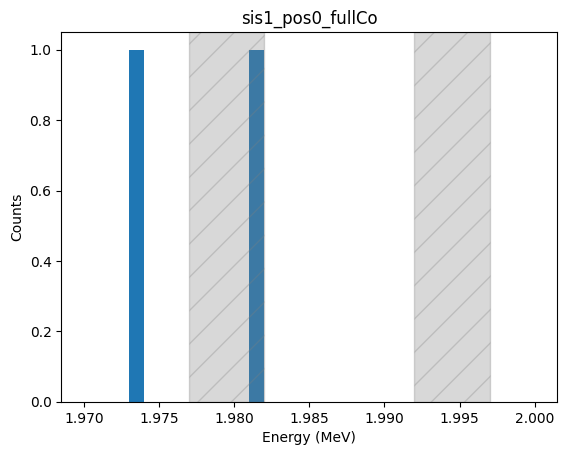

In [8]:
filt_concat_sis1_pos0_fullCo_df = concat_sis1_pos0_fullCo_df.copy()

# Filter the DataFrame based on the current detector_number
filt_concat_sis1_pos0_fullCo_df = filt_concat_sis1_pos0_fullCo_df[filt_concat_sis1_pos0_fullCo_df.detector == detector]
display(filt_concat_sis1_pos0_fullCo_df[(filt_concat_sis1_pos0_fullCo_df.energy >= 1.977) & (filt_concat_sis1_pos0_fullCo_df.energy < 1.982)])
display(filt_concat_sis1_pos0_fullCo_df[(filt_concat_sis1_pos0_fullCo_df.energy >= 1.992) & (filt_concat_sis1_pos0_fullCo_df.energy < 1.997)])
print("Background events in 10 keV window for 2M Co decays:")
print(len(filt_concat_sis1_pos0_fullCo_df[(filt_concat_sis1_pos0_fullCo_df.energy >= 1.977) & (filt_concat_sis1_pos0_fullCo_df.energy < 1.982)]) \
      + len(filt_concat_sis1_pos0_fullCo_df[(filt_concat_sis1_pos0_fullCo_df.energy >= 1.992) & (filt_concat_sis1_pos0_fullCo_df.energy < 1.997)]))
plt.hist(filt_concat_sis1_pos0_fullCo_df["energy"], range=(1.970,2.000), bins = 30)
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.title("sis1_pos0_fullCo")
plt.axvspan(xmin=1.977, xmax=1.982, color='gray', alpha=0.3, hatch='/')
plt.axvspan(xmin=1.992, xmax=1.997, color='gray', alpha=0.3, hatch='/')

,detector,energy


,detector,energy


Background events in 10 keV window for 2M Co decays:
0


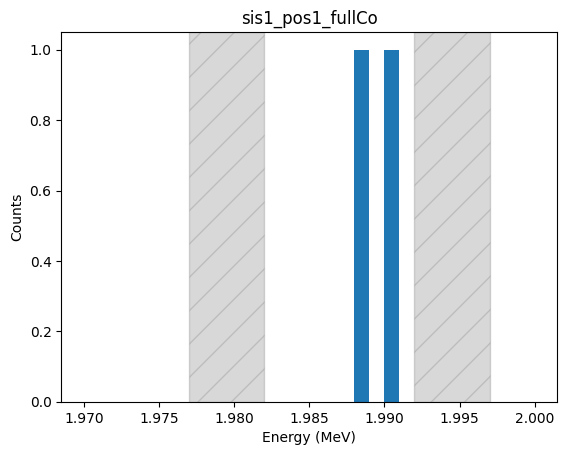

In [9]:
filt_concat_sis1_pos1_fullCo_df = concat_sis1_pos1_fullCo_df.copy()

# Filter the DataFrame based on the current detector_number
filt_concat_sis1_pos1_fullCo_df = filt_concat_sis1_pos1_fullCo_df[filt_concat_sis1_pos1_fullCo_df.detector == detector]
display(filt_concat_sis1_pos1_fullCo_df[(filt_concat_sis1_pos1_fullCo_df.energy >= 1.977) & (filt_concat_sis1_pos1_fullCo_df.energy < 1.982)])
display(filt_concat_sis1_pos1_fullCo_df[(filt_concat_sis1_pos1_fullCo_df.energy >= 1.992) & (filt_concat_sis1_pos1_fullCo_df.energy < 1.997)])
print("Background events in 10 keV window for 2M Co decays:")
print(len(filt_concat_sis1_pos1_fullCo_df[(filt_concat_sis1_pos1_fullCo_df.energy >= 1.977) & (filt_concat_sis1_pos1_fullCo_df.energy < 1.982)]) \
      + len(filt_concat_sis1_pos1_fullCo_df[(filt_concat_sis1_pos1_fullCo_df.energy >= 1.992) & (filt_concat_sis1_pos1_fullCo_df.energy < 1.997)]))
plt.hist(filt_concat_sis1_pos1_fullCo_df["energy"], range=(1.970,2.000), bins = 30)
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.title("sis1_pos1_fullCo")
plt.axvspan(xmin=1.977, xmax=1.982, color='gray', alpha=0.3, hatch='/')
plt.axvspan(xmin=1.992, xmax=1.997, color='gray', alpha=0.3, hatch='/')

,detector,energy
580701,[1010502],1.980744
665177,[1010502],1.977409


,detector,energy
735199,[1010502],1.994100
774718,[1010502],1.995322


Background events in 10 keV window for 2M Co decays:
4


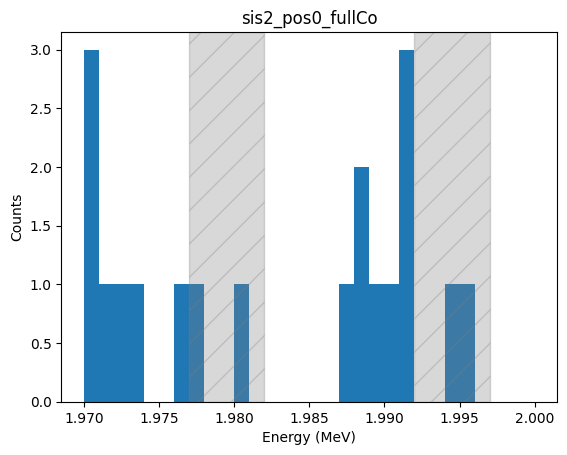

In [10]:
filt_concat_sis2_pos0_fullCo_df = concat_sis2_pos0_fullCo_df.copy()

# Filter the DataFrame based on the current detector_number
filt_concat_sis2_pos0_fullCo_df = filt_concat_sis2_pos0_fullCo_df[filt_concat_sis2_pos0_fullCo_df.detector == detector]
display(filt_concat_sis2_pos0_fullCo_df[(filt_concat_sis2_pos0_fullCo_df.energy >= 1.977) & (filt_concat_sis2_pos0_fullCo_df.energy < 1.982)])
display(filt_concat_sis2_pos0_fullCo_df[(filt_concat_sis2_pos0_fullCo_df.energy >= 1.992) & (filt_concat_sis2_pos0_fullCo_df.energy < 1.997)])
print("Background events in 10 keV window for 2M Co decays:")
print(len(filt_concat_sis2_pos0_fullCo_df[(filt_concat_sis2_pos0_fullCo_df.energy >= 1.977) & (filt_concat_sis2_pos0_fullCo_df.energy < 1.982)]) \
      + len(filt_concat_sis2_pos0_fullCo_df[(filt_concat_sis2_pos0_fullCo_df.energy >= 1.992) & (filt_concat_sis2_pos0_fullCo_df.energy < 1.997)]))
plt.hist(filt_concat_sis2_pos0_fullCo_df["energy"], range=(1.970,2.000), bins = 30)
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.title("sis2_pos0_fullCo")
plt.axvspan(xmin=1.977, xmax=1.982, color='gray', alpha=0.3, hatch='/')
plt.axvspan(xmin=1.992, xmax=1.997, color='gray', alpha=0.3, hatch='/')

,detector,energy
29656,[1010502],1.979838
42195,[1010502],1.980859
44318,[1010502],1.977562
52569,[1010502],1.978045
55610,[1010502],1.979549
...,...,...
828356,[1010502],1.979168
831052,[1010502],1.979733
833317,[1010502],1.980276
838338,[1010502],1.978045


,detector,energy
737,[1010502],1.992621
12297,[1010502],1.994943
15529,[1010502],1.995058
16092,[1010502],1.993005
21829,[1010502],1.992002
...,...,...
808616,[1010502],1.993187
827829,[1010502],1.994502
829065,[1010502],1.992672
832058,[1010502],1.995806


Background events in 10 keV window for 2M Co decays:
241


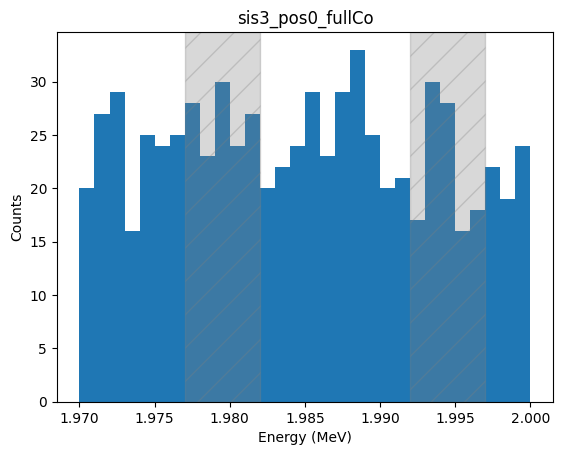

In [11]:
filt_concat_sis3_pos0_fullCo_df = concat_sis3_pos0_fullCo_df.copy()

# Filter the DataFrame based on the current detector_number
filt_concat_sis3_pos0_fullCo_df = filt_concat_sis3_pos0_fullCo_df[filt_concat_sis3_pos0_fullCo_df.detector == detector]
display(filt_concat_sis3_pos0_fullCo_df[(filt_concat_sis3_pos0_fullCo_df.energy >= 1.977) & (filt_concat_sis3_pos0_fullCo_df.energy < 1.982)])
display(filt_concat_sis3_pos0_fullCo_df[(filt_concat_sis3_pos0_fullCo_df.energy >= 1.992) & (filt_concat_sis3_pos0_fullCo_df.energy < 1.997)])
print("Background events in 10 keV window for 2M Co decays:")
print(len(filt_concat_sis3_pos0_fullCo_df[(filt_concat_sis3_pos0_fullCo_df.energy >= 1.977) & (filt_concat_sis3_pos0_fullCo_df.energy < 1.982)]) \
      + len(filt_concat_sis3_pos0_fullCo_df[(filt_concat_sis3_pos0_fullCo_df.energy >= 1.992) & (filt_concat_sis3_pos0_fullCo_df.energy < 1.997)]))
plt.hist(filt_concat_sis3_pos0_fullCo_df["energy"], range=(1.970,2.000), bins = 30)
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.title("sis3_pos0_fullCo")
plt.axvspan(xmin=1.977, xmax=1.982, color='gray', alpha=0.3, hatch='/')
plt.axvspan(xmin=1.992, xmax=1.997, color='gray', alpha=0.3, hatch='/')

,detector,energy
204658,[1010502],1.987763
222226,[1010502],1.985091
253342,[1010502],1.984219
385740,[1010502],1.983550
391921,[1010502],1.986136
397357,[1010502],1.985699
409596,[1010502],1.986919
479587,[1010502],1.991273
504918,[1010502],1.982646


Peak + Bkg counts in 10 keV window for 200 M Co decays:
9
Background events in 10 keV window for 2M gamma decays:
4


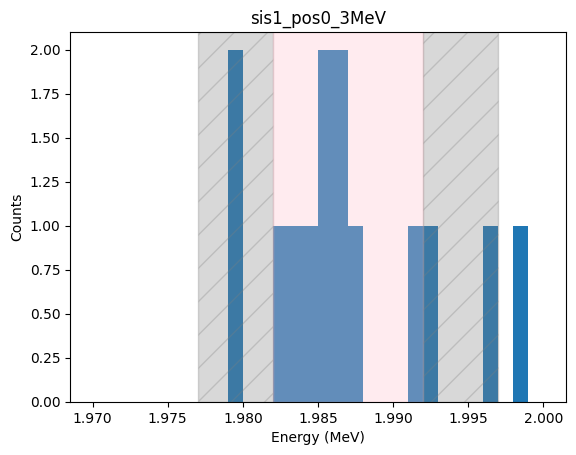

In [12]:
filt_concat_sis1_pos0_gamma3009_df = concat_sis1_pos0_gamma3009_df.copy()

# Filter the DataFrame based on the current detector_number
filt_concat_sis1_pos0_gamma3009_df = filt_concat_sis1_pos0_gamma3009_df[filt_concat_sis1_pos0_gamma3009_df.detector == detector]
display(filt_concat_sis1_pos0_gamma3009_df[(filt_concat_sis1_pos0_gamma3009_df.energy >= 1.982) & (filt_concat_sis1_pos0_gamma3009_df.energy < 1.992)])
print("Peak + Bkg counts in 10 keV window for 200 M Co decays:")
print(len(filt_concat_sis1_pos0_gamma3009_df[(filt_concat_sis1_pos0_gamma3009_df.energy >= 1.982) & (filt_concat_sis1_pos0_gamma3009_df.energy < 1.992)]))
print("Background events in 10 keV window for 2M gamma decays:")
print(len(filt_concat_sis1_pos0_gamma3009_df[(filt_concat_sis1_pos0_gamma3009_df.energy >= 1.977) & (filt_concat_sis1_pos0_gamma3009_df.energy < 1.982)]) \
      + len(filt_concat_sis1_pos0_gamma3009_df[(filt_concat_sis1_pos0_gamma3009_df.energy >= 1.992) & (filt_concat_sis1_pos0_gamma3009_df.energy < 1.997)]))
plt.hist(filt_concat_sis1_pos0_gamma3009_df["energy"], range=(1.970,2.000), bins = 30)
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.title("sis1_pos0_3MeV")
plt.axvspan(xmin=1.977, xmax=1.982, color='gray', alpha=0.3, hatch='/')
plt.axvspan(xmin=1.982, xmax=1.992, color='pink', alpha=0.3)
plt.axvspan(xmin=1.992, xmax=1.997, color='gray', alpha=0.3, hatch='/')

,detector,energy
15007,[1010502],1.984707
33041,[1010502],1.984087
92878,[1010502],1.989159
182196,[1010502],1.989167
214502,[1010502],1.989844
291909,[1010502],1.991424
348425,[1010502],1.985257
492107,[1010502],1.987859
542943,[1010502],1.984278
559781,[1010502],1.985285


Peak + Bkg counts in 10 keV window for 200 M Co decays:
10
Background events in 10 keV window for 2M gamma decays:
2


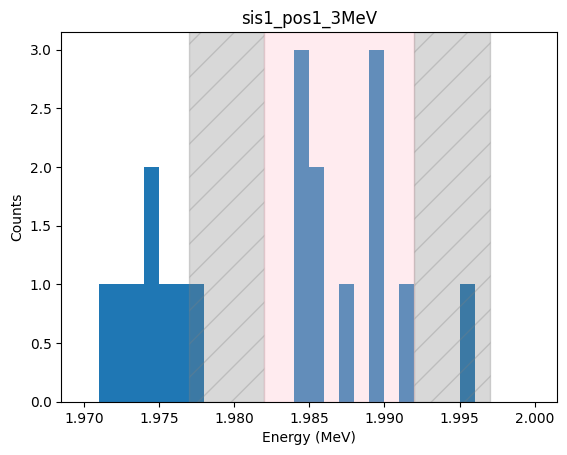

In [13]:
filt_concat_sis1_pos1_gamma3009_df = concat_sis1_pos1_gamma3009_df.copy()

# Filter the DataFrame based on the current detector_number
filt_concat_sis1_pos1_gamma3009_df = filt_concat_sis1_pos1_gamma3009_df[filt_concat_sis1_pos1_gamma3009_df.detector == detector]
display(filt_concat_sis1_pos1_gamma3009_df[(filt_concat_sis1_pos1_gamma3009_df.energy >= 1.982) & (filt_concat_sis1_pos1_gamma3009_df.energy < 1.992)])
print("Peak + Bkg counts in 10 keV window for 200 M Co decays:")
print(len(filt_concat_sis1_pos1_gamma3009_df[(filt_concat_sis1_pos1_gamma3009_df.energy >= 1.982) & (filt_concat_sis1_pos1_gamma3009_df.energy < 1.992)]))
print("Background events in 10 keV window for 2M gamma decays:")
print(len(filt_concat_sis1_pos1_gamma3009_df[(filt_concat_sis1_pos1_gamma3009_df.energy >= 1.977) & (filt_concat_sis1_pos1_gamma3009_df.energy < 1.982)]) \
      + len(filt_concat_sis1_pos1_gamma3009_df[(filt_concat_sis1_pos1_gamma3009_df.energy >= 1.992) & (filt_concat_sis1_pos1_gamma3009_df.energy < 1.997)]))
plt.hist(filt_concat_sis1_pos1_gamma3009_df["energy"], range=(1.970,2.000), bins = 30)
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.title("sis1_pos1_3MeV")
plt.axvspan(xmin=1.977, xmax=1.982, color='gray', alpha=0.3, hatch='/')
plt.axvspan(xmin=1.982, xmax=1.992, color='pink', alpha=0.3)
plt.axvspan(xmin=1.992, xmax=1.997, color='gray', alpha=0.3, hatch='/')

,detector,energy
8426,[1010502],1.983536
26268,[1010502],1.985098
31848,[1010502],1.985653
43656,[1010502],1.990644
68585,[1010502],1.988946
...,...,...
595607,[1010502],1.991187
595966,[1010502],1.986337
606185,[1010502],1.988084
630749,[1010502],1.985662


Peak + Bkg counts in 10 keV window for 200 M Co decays:
71
Background events in 10 keV window for 2M gamma decays:
25


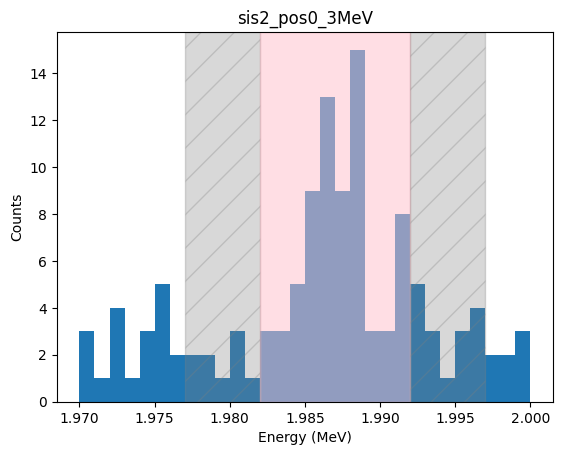

In [14]:
filt_concat_sis2_pos0_gamma3009_df = concat_sis2_pos0_gamma3009_df.copy()

# Filter the DataFrame based on the current detector_number
filt_concat_sis2_pos0_gamma3009_df = filt_concat_sis2_pos0_gamma3009_df[filt_concat_sis2_pos0_gamma3009_df.detector == detector]
display(filt_concat_sis2_pos0_gamma3009_df[(filt_concat_sis2_pos0_gamma3009_df.energy >= 1.982) & (filt_concat_sis2_pos0_gamma3009_df.energy < 1.992)])
plt.hist(filt_concat_sis2_pos0_gamma3009_df["energy"], range=(1.970,2.000), bins = 30)
print("Peak + Bkg counts in 10 keV window for 200 M Co decays:")
print(len(filt_concat_sis2_pos0_gamma3009_df[(filt_concat_sis2_pos0_gamma3009_df.energy >= 1.982) & (filt_concat_sis2_pos0_gamma3009_df.energy < 1.992)]))
print("Background events in 10 keV window for 2M gamma decays:")
print(len(filt_concat_sis2_pos0_gamma3009_df[(filt_concat_sis2_pos0_gamma3009_df.energy >= 1.977) & (filt_concat_sis2_pos0_gamma3009_df.energy < 1.982)]) \
      + len(filt_concat_sis2_pos0_gamma3009_df[(filt_concat_sis2_pos0_gamma3009_df.energy >= 1.992) & (filt_concat_sis2_pos0_gamma3009_df.energy < 1.997)]))
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.title("sis2_pos0_3MeV")
plt.axvspan(xmin=1.982, xmax=1.992, color='pink', alpha=0.3)
plt.axvspan(xmin=1.977, xmax=1.982, color='gray', alpha=0.3, hatch='/')
plt.axvspan(xmin=1.982, xmax=1.992, color='pink', alpha=0.3)
plt.axvspan(xmin=1.992, xmax=1.997, color='gray', alpha=0.3, hatch='/')

,detector,energy
826,[1010502],1.984599
916,[1010502],1.986965
2916,[1010502],1.987086
3074,[1010502],1.989679
3808,[1010502],1.984907
...,...,...
672104,[1010502],1.986310
672634,[1010502],1.989110
672867,[1010502],1.988279
673260,[1010502],1.988521


Peak + Bkg counts in 10 keV window for 200 M Co decays:
964
Background events in 10 keV window for 2M gamma decays:
355


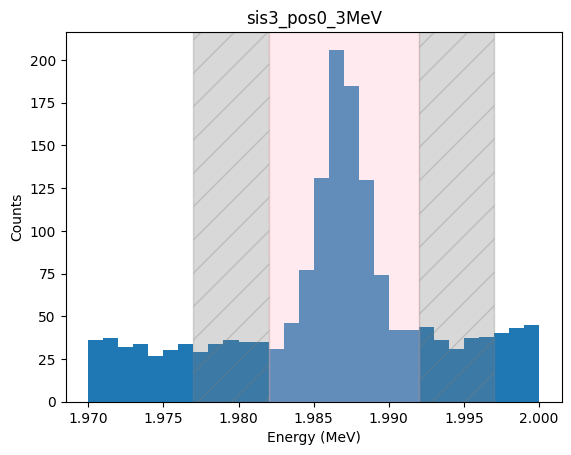

In [15]:
filt_concat_sis3_pos0_gamma3009_df = concat_sis3_pos0_gamma3009_df.copy()

# Filter the DataFrame based on the current detector_number
filt_concat_sis3_pos0_gamma3009_df = filt_concat_sis3_pos0_gamma3009_df[filt_concat_sis3_pos0_gamma3009_df.detector == detector]
display(filt_concat_sis3_pos0_gamma3009_df[(filt_concat_sis3_pos0_gamma3009_df.energy >= 1.982) & (filt_concat_sis3_pos0_gamma3009_df.energy < 1.992)])
plt.hist(filt_concat_sis3_pos0_gamma3009_df["energy"], range=(1.970,2.000), bins = 30)
print("Peak + Bkg counts in 10 keV window for 200 M Co decays:")
print(len(filt_concat_sis3_pos0_gamma3009_df[(filt_concat_sis3_pos0_gamma3009_df.energy >= 1.982) & (filt_concat_sis3_pos0_gamma3009_df.energy < 1.992)]))
print("Background events in 10 keV window for 2M gamma decays:")
print(len(filt_concat_sis3_pos0_gamma3009_df[(filt_concat_sis3_pos0_gamma3009_df.energy >= 1.977) & (filt_concat_sis3_pos0_gamma3009_df.energy < 1.982)]) \
      + len(filt_concat_sis3_pos0_gamma3009_df[(filt_concat_sis3_pos0_gamma3009_df.energy >= 1.992) & (filt_concat_sis3_pos0_gamma3009_df.energy < 1.997)]))
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.title("sis3_pos0_3MeV")
plt.axvspan(xmin=1.977, xmax=1.982, color='gray', alpha=0.3, hatch='/')
plt.axvspan(xmin=1.982, xmax=1.992, color='pink', alpha=0.3)
plt.axvspan(xmin=1.992, xmax=1.997, color='gray', alpha=0.3, hatch='/')